# Machine Learning: Aprendizaje no supervisado

**Machine Learning:**

El machine Learning o aprendizaje automático consiste básicamente en automatizar, mediante distintos algoritmos, la identificación de patrones o tendencias que se “esconden” en los datos. Es una rama de la inteligencia artificial que empezó a cobrar importancia a partir de los años 80. Se trata de un tipo de IA que ya no depende de unas reglas y un programador, sino que la computadora puede establecer sus propias reglas y aprender por sí misma.

El objetivo del machine learning es crear un modelo que nos permita resolver una tarea dada. Luego se entrena el modelo usando gran cantidad de datos. El modelo aprende de estos datos y es capaz de hacer predicciones. Es, por lo tanto, un proceso de inducción del conocimiento, es decir, un método que permite obtener por generalización un enunciado general a partir de enunciados que describen casos particulares. Según la tarea que se quiera realizar, será más adecuado trabajar con un algoritmo u otro.

Los tipos de implementación de machine Learning pueden clasificarse en tres categorías diferentes:

- Aprendizaje supervisado
- Aprendizaje no supervisado
- Aprendizaje de refuerzo según la naturaleza de los datos que recibe.

**Aprendizaje no supervisado:**

El aprendizaje no supervisado tiene lugar cuando no se dispone de datos etiquetados para el entrenamiento. Sólo conocemos los datos de entrada, pero no existen datos de salida que correspondan a un determinado input. Por tanto, sólo podemos describir la estructura de los datos, para intentar encontrar algún tipo de organización que simplifique el análisis. Por ello, tiene un carácter exploratorio.

Por ejemplo, las tareas de clustering, buscan agrupamientos basados en similitudes, pero nada garantiza que éstas tengan algún significado o utilidad. En ocasiones, al explorar los datos sin un objetivo definido, se pueden encontrar correlaciones espúreas curiosas, pero poco prácticas.

El aprendizaje no supervisado se suele usar en:

- Problemas de clustering
- Agrupamientos de co-ocurrencias
- Perfilado o profiling.

Los tipos de algoritmo más habituales en aprendizaje no supervisado son:

- Algoritmos de clustering (KMeans, agrupación jerárquica, DBSCAN)
- Análisis de componentes principales (Principal Component Analysis - PCA)
- Descomposición en valores singulares (Singular Value Decomposition - SVD)

# 1. Algoritmos de clusterización

Se conoce como clustering a las técnicas de machine learning que permiten identificar patrones o grupos (clusters) dentro de un conjunto de observaciones. Estas técnicas forman parte de los métodos no supervisados. Estas técnicas tambien reciben comunmente el nombre de segmentación.

Un ejemplo de utilización de estos algoritmos podría ser segmentar a los clientes de un banco en diferentes categorías, en base a información como edad, nómina, patrimonio, productos bancarios contratados...etc.

Pueden diferenciarse tres grupos principales:

- Hierarchical Clustering: no es necesario definir con anterioridad el número de agrupaciones: clustering aglomerativo y divisivo.

- Partitioning Clustering: se define previamente el número de clusters por parte del usuario: K-means, K-medoids, CLARA.

- Métodos que combinan o modifican los anteriores (hierarchical K-means, fuzzy clustering, model based clustering y density based clustering).

<center><img src="../_images\ml_clst_cluster.png" alt="Drawing" style="width: 600px;"/></center>

## 1.1. Distancias

A pesar de que el abánico de técnicas de clusterización es muy amplio, todos los métodos tienen un punto en común, y es que se necesita una medida de similitud entre observaciones que permita agrupar o no las observaciones del dataset.

Esta medida de similitud es lo que se conoce dentro del ámbito del clustering como distancia. Si llevamos cada observación a un espacio dimensional $k$, donde $k$ es cada una de las variables del modelo, las observaciones más similares se encontrarán más cerca dentro de este espacio. Es por esto que se denomina a este indicador de similitud, distancia.

Existen diferentes formas de calcular la distancia entre dos observaciones $x_i$ y $x_j$ en un espacio dimensional $k$:

**Distancia Euclidea:**

La distancia euclídea entre dos puntos $x_i$ y $x_j$ se define como la longitud del segmento que une ambos puntos. En coordenadas cartesianas, la distancia euclídea se calcula empleando el teorema de Pitágoras. Su fórmula es:

\begin{align}
D_1(x_i, x_j) =\sqrt{(x_{i1}-x_{j1})^2+(x_{i2}-x_{j2})^2+...+(x_{in}-x_{jn})^2}=\sqrt{\sum_{k=1}^{n} (x_{ik}-x_{jk})^2}
\end{align}

**Distancia Manhattan:**

La distancia de Manhattan, también conocida como taxicab metric, rectilinear distance o L1 distance, define la distancia entre dos puntos $x_i$ y $x_j$ como el sumatorio de las diferencias absolutas entre cada dimensión. Esta medida se ve menos afectada por outliers (es más robusta) que la distancia euclídea debido a que no eleva al cuadrado las diferencias. Su fórmula es:

\begin{align}
D_1(x_i, x_j) = |x_{i1}-x_{j1}|+|x_{i2}-x_{j2}|+...+|x_{in}-x_{jn}|=\sum_{k=1}^{n} |x_{ik}-x_{jk}|
\end{align}

**Distancia de Minkowski:**

La fórmula de la distancia de Minkowski tiene una estructura similar a la distancia euclidea, solo que en esta se puede definir un parámetro $p$ que cuanto más grande es, más minimiza la distancia entre las observaciones.

\begin{align}
D_1(x_i, x_j) =\sqrt[p]{(x_{i1}-x_{j1})^p+(x_{i2}-x_{j2})^p+...+(x_{in}-x_{jn})^p}=\sqrt[p]{\sum_{k=1}^{n} (x_{ik}-x_{jk})^p}
\end{align}

> *Para $p=1$ obtenemos la distancia de Manhattan, y para $p=2$ la distancia Euclidea.*

**Normalización de distancias:**

Dado que es posible que no todas las variables tengan el mismo rango, es necesario normalizar el dataset. Esto se debe a que en caso no hacerlo, aquellas variables que tengan valores muy altos pueden tener mucha más significancia (a nivel de distancia) que otras variables que tengan relevancia, sesgando el modelo y marcando la agrupación final.

Una de las formas de normalizar un dataset es aplicar a cada variable una normalización en base a su media y desviación estándar:

\begin{align}
x_i' = \frac{x_i-\mu}{\sigma}
\end{align}

## 1.2. Clustering jerárquico

El clustering jerárquico es un método de agrupación de observaciones en el que no es necesario definir el número de grupos final. Este algoritmo agrupa los datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí.

En base a la estrategia seguida para crear los grupos, los algoritmos de clustering jerárquico se pueden dividir en dos grupos:

- Aglomerativos
- Divisivos

**Clustering aglomerativo (agglomerative clustering or bottom-up):** en este método cada observación empieza siendo un cluster independiente, y en cada iteración del algoritmo, se va buscando que puntos son los que tienen menor distancia (mayor similitud) entre ellos para ir agrupándolos en nuevos clusters. Este proceso se repite hasta que todas las observaciones convergen en un único cluster.

Para este método es necesario definir el tipo distancia y nexo (*linkage*) entre clusters. Las tipologías de *linkage* más frecuentes son:

- Máximo (*complete or maximum*): es la distancia entre los dos puntos más aldejados de dos clusters diferentes. Es la medida más conservadora.
- Mínimo (*single or minimum*): es la distancia entre los dos puntos más cercanos de dos clusters diferentes. Es la medida menos conservadora.
- Media (*average*): es la distancia media entre todos los pares de observaciones de dos clusters.
- Centroide (*centroid*): es la distancia entre los centroides de dos clusters.
- Ward: es un método cuyo objetivo es reducir la suma total de varianza intra-cluster.

Los tipo de *linkage* más utilizados son el *complete*, *average* y *Ward*, ya que son los que generan unos dendrogramas mas compensados y con clusters más definidos, aunque esta práctica no se puede generalizar y será necesario estudiar cada caso en particular para ver cual se adapta mejor.

<center><img src="../_images\ml_clst_linkage.png" alt="Drawing" style="width: 200px;"/></center>

**Clustering divisivo (divisive clustering or top-down):** al contrario que en el método anterior, en este caso se inicia el proceso con todas las observaciones formando parte de un único cluster, el cual se va dividiendo progresivamente en función de las distancias entre los nuevos clusteres que vayan surgiendo de cada iteración. Este proceso se repite hasta que cada observación forma un único cluster.

Al contrario en el caso aglomerativo, en este tipo de agrupación solo es necesario indicar el tipo de distancia a emplear. En cada iteración se buscará que ésta distancia sea máxima de modo que los clusters creados sean lo más diferentes posibles.

Este último algoritmo puede ser más preciso que el anterior, pero dado que tiene que ir subdiviendo cada vez más el dataset y las características del algoritmo, si no se parametriza bien, puede ser muy demandante desde el punto de vista computacional.

**Dendrograma:**

Una forma muy intuitiva de representar los métodos jerárquicos, es medianta una estructura de árbol que recibe el nombre de dendrograma.

Un dendrograma es un tipo de representación gráfica o diagrama de datos en forma de árbol que organiza los datos en subcategorías que se van dividiendo en otros hasta llegar al nivel de detalle deseado (asemejándose a las ramas de un árbol que se van dividiendo en otras sucesivamente). Este tipo de representación permite apreciar claramente las relaciones de agrupación entre los datos e incluso entre grupos de ellos aunque no las relaciones de similitud o cercanía entre categorías.

Una vez creado el dendrograma, hay que evaluar hasta qué punto su estructura refleja las distancias originales entre observaciones. Una forma de hacerlo es empleando el coeficiente de correlación entre las distancias *cophenetic* del dendrograma (altura de los nodos) y la matriz de distancias original. Cuanto más cercano es el valor a 1, mejor refleja el dendrograma la verdadera similitud entre las observaciones. Valores superiores a 0.75 suelen considerarse como buenos. Esta medida puede emplearse como criterio de ayuda para escoger entre los distintos métodos de *linkage*.

El dendrograma, también es un buen método gráfico para obtener de forma aproximada el número óptimo de clusters.

<center><img src="../_images\ml_clst_dendrogram.png" alt="Drawing" style="width: 600px;"/></center>

**Clustering jerárquico con Python:**

In [24]:
## Importamos librerias
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")

In [25]:
## Cargamos el fichero de trabajo
path = "../_data/_shopping_data/shopping_data.csv"
df_shopping = pd.read_csv(path)

df_shopping.head(3)

,CustomerID,Genre,Age,Annual_Income_k,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


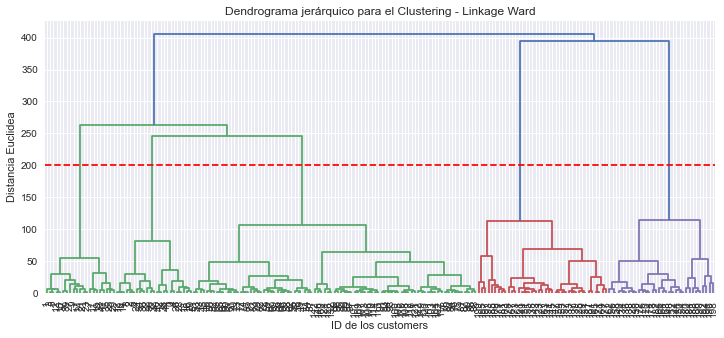

In [26]:
# Nos quedamos solo con aquellas variables con información relativas a los ingresos y al score
X = df_shopping[['Annual_Income_k', 'Spending_Score']]

# Definimos el tipo de linkage (Ward), la distancia por defecto es la Euclidea 
z = linkage(X, 'ward')   # linkage(input, method, metric)

# Graficamos el dendrograma
plt.figure(figsize = (12, 5))
plt.title("Dendrograma jerárquico para el Clustering - Linkage Ward")
plt.xlabel("ID de los customers")
plt.ylabel("Distancia Euclidea")
dendrogram(z, leaf_rotation = 90., leaf_font_size = 10.0)
plt.axhline(y=200, color='r', linestyle='--')                   ## Cortamos del dendograma graficamente
plt.show()

Una vez se tiene el dendrograma de todas las observaciones, es posible hallar de forma visual el número óptimo de clusters. Para ello se busca la agrupación de clusters que tenga mayor distancia entre el final y la unión de sus ramas (granate y morado), y se traza una línea horizontal de modo que cruce el mayor número de ramas, en este caso, obtendríamos 5 clusters.

Una vez se ha definido el número de clusters, podemos agrupar las observaciones en base a esto mediante la función `AgglomerativeClustering` de `scikit-learn`.

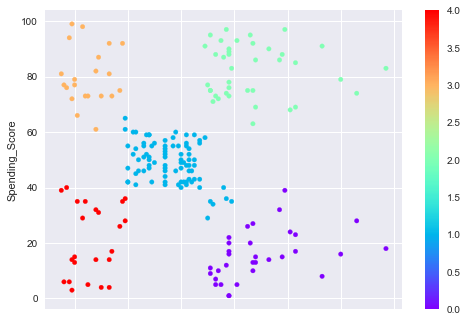

In [27]:
# Instanciamos el cluster
cluster = AgglomerativeClustering(
    n_clusters=5,
    affinity='euclidean',
    linkage='ward')

# Realizamos la predicción sobre los datos
cluster.fit_predict(X)

# Graficamos los clusters
X.plot(kind="scatter",
       x="Annual_Income_k",
       y="Spending_Score",
       c=cluster.labels_,
       cmap='rainbow');

## 1.3. Clustering K-Means

El algoritmo k-means es otro método de clusterización no supervisado que agrupa observaciones de manera iterativa, en base al cálculo de los centroides de los clusters creados en cada paso, tratando de minimizar en cada uno de ellos la varianza intra-cluster. En este método es necesario indicar de antemano el número $k$ de agrupaciones final.

La varianza intra-cluster se define como la suma de distancias euclideas al cuadrado entre cada punto $x_i$ del cluster $C_k$, y su centroide $\mu_k$, entre el número total de puntos del cluster $|C_k|$:

\begin{align}
W(C_k) =\frac{1}{|C_k|} \sum_{x_i \in C_k} (x_i-\mu_k)^2
\end{align}

Desde el punto de vista matemático, también es necesario indicar que todos los puntos pertenecen a algún cluster, y que los clusters no pueden solaparse.

La forma de implementar este algoritmo es la siguiente:

1. Definir el número $k$ de clusters
2. Seleccionar de forma aleatoria $k$ observaciones a modo de centroides iniciales
3. Agrupar cada observación con su centroide más cercano
4. Para cada cluster creado, recalcular el centroide
5. Repetir los pasos 3 y 4 hasta que se alcance un número fijado de iteraciones, o no haya cambios en los clusters

Debido a que el algoritmo k-means está basado en gran medidad en la asignación aleatoria inicial de los centroides, se suele ejecutar el algoritmo en repetidas ocasiones (25-50) cada una con unos centroides iniciales diferentes, y se escoge aquella agrupación que tenga un valor menor de la varianza total.

Hay que indicar que este algoritmo es sensible a la presencia de outliers, por lo que se deben eliminar antes del proceso o por el contrario decantarse por una variación de este método denominada k-medoids (PAM), o una modificación de éste último conocida como CLARA.

### 1.3.1. Número óptimo de clusters

Determinar el número óptimo de clusters es uno de los pasos más complicados a la hora de aplicar métodos de clustering, sobre todo cuando se trata de partitioning clustering, donde el número se tiene que especificar antes de poder ver los resultados. No existe una forma única de averiguar el número adecuado de clusters. Es un proceso bastante subjetivo que depende en gran medida del tipo de clustering empleado y de si se dispone de información previa sobre los datos con los que se está trabajando, por ejemplo, estudios anteriores pueden sugerir o acotar las posibilidades. A pesar de ello, se han desarrollado varias estrategias que ayudan en el proceso.

**Método del codo:**

El método del codo *(elbow method)* sigue una estrategia comúnmente empleada para encontrar el valor óptimo de un hiperparámetro. La idea general es probar un rango de valores del hiperparámetro en cuestión, representar gráficamente los resultados obtenidos con cada uno e identificar aquel punto de la curva a partir del cual la mejora deja de ser sustancial (principio de verosimilitud).

En el caso particular del clustering, el hiperparámetro se trata del número $k$ de clusters. Para implementar este método, se realiza una clusterización desde 1 hasta un número determinado de clusters, y para cada $k$, se obtiene el indicador WCSS (Within-Cluster-Sum-of-Squares) que es la suma de distancias euclideas al cuadrado entre el centroide del cluster y el resto de observaciones.

Cada WCSS se grafica en función de su $k$, y donde aparezca un punto de inflexión donde para cada incremento de $k$, la mejora del WCSS sea poco significativa (codo), se obtendrá el número óptimo de clusters del modelo.

<center><img src="../_images\ml_clst_elbow.png" alt="Drawing" style="width: 400px;"/></center>

**Clustering k-means con Python:**

In [29]:
# Importamos librerias
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")

In [30]:
## Cargamos el fichero de trabajo
path = "../_data/_shopping_data/shopping_data.csv"
df_shopping = pd.read_csv(path)

# Nos quedamos solo con aquellas variables con información relativas a los ingresos y al score
X = df_shopping[['Annual_Income_k', 'Spending_Score']]

**Definir el número de clusters $k$:**

A diferencia de los métodos jerárquicos, en este algoritmo es necesario indicar primero el número de clusters en el que se quiere segmentar el dataset, para ello, se puede utilizar el método del codo:

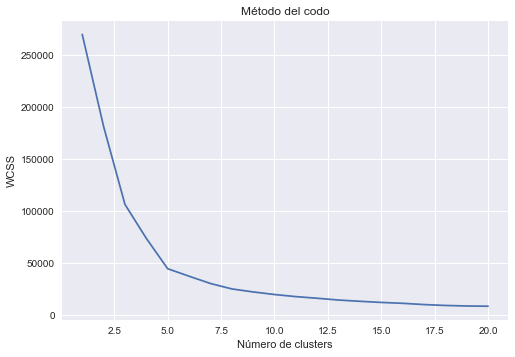

In [31]:
# Definimos un array vacío donde iremos incluyendo todas las inercias del método
wcss = []

# Obtenemos la incercia del modelo para los valores de k de 1 a 20.
for i in range(1,21):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',        # Realiza un estudio preliminar para definir los mejores centroides iniciales
        max_iter = 300,            # Número máximo de iteraciones del proceso
        n_init = 10                # Número de veces que se repite el algoritmo con centroides iniciales diferentes
    )        

    # Ajustamos el algoritmo al dataset
    kmeans.fit(X)

    # Apendeamos todas las inercias en el array inicial
    wcss.append(kmeans.inertia_)   # inertia_: sum of squared distances of samples to their closest cluster center


# Graficamos el método del codo
plt.plot(range(1,21), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Observamos que el cambio más significativo en el WCSS se produce en el número 5, por lo que definiremos éste número como el valor de $k$.

In [32]:
# Instanciamos el modelo con 5 clusters
kmeans = KMeans(
    n_clusters = 5,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 0)

y_kmeans = kmeans.fit_predict(X)

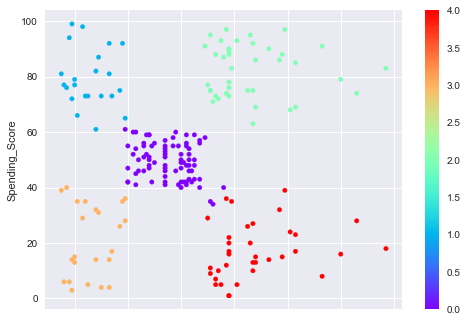

In [34]:
X.plot(
    kind="scatter",
    x="Annual_Income_k",
    y="Spending_Score",
    c=kmeans.labels_,
    cmap='rainbow');

Observando los gráficos obtenidos por el método jerárquico y k-means y comparando, se puede apreciar que los clusters son muy similares. Es cierto que existe alguna transferencia de puntos entre los colores cyan, morado y rojo, pero es muy leve.

## 1.4. Clustering DBSCAN

DBSCAN (*Density-based spatial clustering of applications with noise*) es un algoritmo que permite identificar clusters de un modo más o menos similar al que lo haría el cerebro humanos, es decir, identificando zonas con alta densidad de puntos entre las que hay zonas con menor densidad entremedias. El término ruido hace referencia a que este algoritmo identifica también posibles *outliers*.

DBSCAN trabaja bajo la idea de que para que un punto forme parate de un cluster, debe haber al menos un mínimo número de observaciones dentro de un radio ($\epsilon$ - *epsilon*) de proximidad, y que además los clusters estén separados por zonas en las que haya una densidad baja de observaciones.

De la descripción anterior, se puede inferir que el algoritmo DBSCAN necesita dos parámetros:

- *eps*: La distancia máxima entre dos muestras para que una se considere próxima a la otra. Este es el parámetro más importante de DBSCAN. Una buena forma de escoger el valor de $\epsilon$ es estudiar las distancias promedio entre las $k=min_samples$ observaciones más próximas. Si el valor de $\epsilon$ es muy pequeño, una proporción alta de las observaciones no se asignarán a ningún cluster, por el contrario, si el valor es demasiado grande, la mayoría de observaciones se agruparán en un único cluster.

- *min_samples*: El número mínimo de muestras (o peso total) en un cluster para que este se considere como tal. Cuanto mayor sea el tamaño del set de datos, mayor debe ser el valor mínimo de observaciones vecinas; en el libro *Practical Guide to Cluster Analysis in R* recomiendan no bajar nunca de 3. Si los datos contienen niveles altos de ruido, aumentar minPts favorecerá la creación de clusters significativos menos influenciados por outliers.

Empleando estas dos definiciones, cada observación se puede clasificar en una de las siguientes tres categorías:

- *Core point*: observación que tiene en su radio $\epsilon$ un número de observaciones vecinas igual o mayor a minPts.
- *Border point*: observación que no satisface el mínimo de observaciones vecinas para ser core point pero que está incluída en el radio $\epsilon$ de otra observación que sí es *core point*.
- *Noise* u *outlier*: observación que no es *core point* ni *border point*.

La forma de implementar este algoritmo es la siguiente:

1. Para cada observación $x_i$ calcular la distancia entre ella y el resto de observaciones. Si en su radio $\epsilon$ hay un número de observaciones mayor o igual que el mínimo de muestras, marcar la observación como core point, de lo contrario marcarla como visitada.
2. Para cada observación $x_i$ marcada como core point, si todavía no ha sido asignada a ningún cluster, crear uno nuevo y asignarla a él. Encontrar recursivamente todas las observaciones densamente conectadas a ella y asignarlas al mismo cluster.
3. Iterar el mismo proceso para todas las observaciones que no hayan sido visitadas.
4. Aquellas observaciones que tras haber sido visitadas no pertenecen a ningún cluster se marcan como outliers.

Como resultado, todo cluster cumple dos propiedades: todos los puntos que forman parte de un mismo cluster están densamente conectados entre ellos y, si una observación $x_i$ es densamente alcanzable desde cualquier otra observación de un cluster, entonces $x_i$ también pertenece al cluster.

<center><img src="../_images\ml_clst_dbscan.png" alt="Drawing" style="width: 250px;"/></center>

**Ventajas de DBSCAN:**

- No requiere que el usuario especifique el número de clusters.
- Es independiente de la forma que tengan los clusters, no tienen por qué ser circulares.
- Puede identificar outliers, por lo que los clusters generados no se influenciados por ellos.


**Desventajas de DBSCAN:**

- No es un método totalmente determinístico: los border points que son alcanzables desde más de un cluster pueden asignarse a uno u otro dependiendo del orden en el que se procesen los datos.
- No genera buenos resultados cuando la densidad de los grupos es muy distinta, ya que no es posible encontrar los parámetros $\epsilon$ y *minPts* que sirvan para todos a la vez.

OPTICS puede verse como una generalización de DBSCAN para múltiples rangos, reemplazando el parámetro $\epsilon$ por el radio máximo de búsqueda.

**Algoritmo DBSCAN con Python:**

In [52]:
# Importamos librerias
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")

In [53]:
# Cargamos el fichero de trabajo
path = "../_data/_shopping_data/shopping_data.csv"

df_shopping = pd.read_csv(path)

# Nos quedamos solo con aquellas variables con información relativas a los ingresos y al score
X = df_shopping[['Annual_Income_k', 'Spending_Score']]

In [64]:
# Instanciamos el modelo DBSCAN
dbscan = DBSCAN(
    eps=10,
    min_samples=10,
    metric='euclidean')

y_dbscan = dbscan.fit_predict(X)

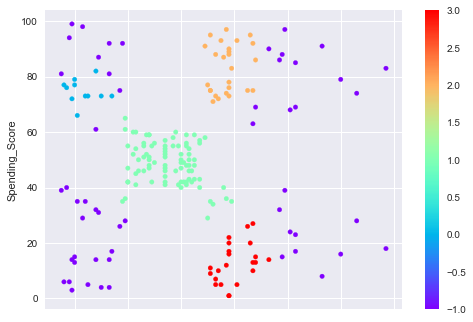

In [65]:
X.plot(
    kind="scatter",
    x="Annual_Income_k",
    y="Spending_Score",
    c=dbscan.labels_,
    cmap='rainbow');

Se observa en el gráfico anterior, el algoritmo DBSCAN no arroja unos resultados similares al resto de modelos. Esto se debe principalmente a que DBSCAN trabaja con densidades de nubes de puntos, y los datos del ejercicio están muy alejados.

Para comprobar si funciona mejor en otros conjuntos de datos, vamos  realizar un prueba con un dataset de observaciones aleatorias.

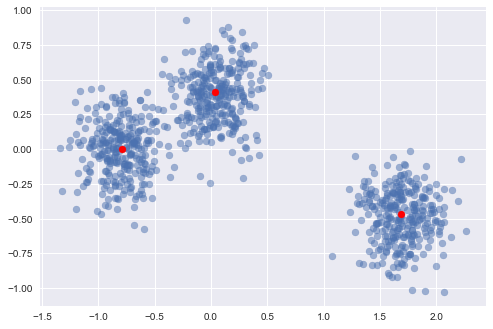

In [72]:
# Centroides aleatorios
np.random.seed(7)
centroids = np.random.randn(3,2)

# Nube de puntos de cada centroide
npoints = 300
scale = .2

first_cluster = scale * np.random.randn(npoints, 2) + centroids[0]
second_cluster =  scale * np.random.randn(npoints, 2) + centroids[1]
third_cluster =  scale * np.random.randn(npoints, 2) + centroids[2]

all_points = np.concatenate([first_cluster, second_cluster, third_cluster])
plt.scatter(all_points[:, 0], all_points[:, 1], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red');

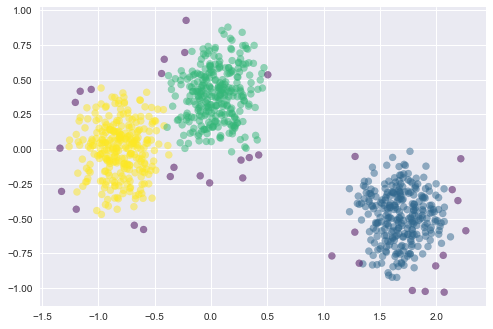

In [79]:
# Instanciamos el modelo DBSCAN
dbscan = DBSCAN(
    eps=0.12,
    min_samples=10,
    metric='euclidean')

y_dbscan = dbscan.fit_predict(all_points)

# Graficamos el modelo
plt.scatter(all_points[:, 0],
            all_points[:, 1],
            c=dbscan.labels_,
            cmap='viridis',
            alpha=0.5);

En este gráfico se se puede apreciar que existen tres clusters diferenciados, y observaciones que no han sido asignadas a ningún grupo por ser consideradas como ruido.

# 2. Reducción de la dimensionalidad

A medida que aumenta el número de dimensiones, la distancias se vuelven menos discriminativas (*Curse of Dimensionality*) y aparecen correlaciones entre variables que redundan la información aportada al modelo, afectando de forma significativa a modelos basados en distancias como k-NN o k-means.

La maldición de la dimensión se manifiesta de dos maneras:

- La distancia media entre los datos aumenta con el número de dimensiones
- La variabilidad (dispersión) de la distancia disminuye exponencialmente con el número de dimensiones (éste es el verdadero problema)

<center><img src="../_images\ml_dim_course.png" alt="Drawing" style="width: 800px;"/></center>

Para mitigar el efecto de la maldición de la dimensión existen dos opciones:

- Reducir el número de dimensiones
- Aumentar (exponencialmente) la cantidad de datos

Como aumentar la volumetría de los datos no siempre es posible ya sea por motivos económicos u operacionales, es necesario inferir cuales serán las variables que aportan mayor información al modelo, este proceso discriminatorio se denomina reducción de la dimensionalidad.

## 2.1. Principal Component Analysis (PCA)

El análisis de componentes principales (*Principal Component Analysis - PCA*) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

<center><img src="../_images\ml_unsup_pca.png" alt="Drawing" style="width: 400px;"/></center>

La intuición detrás de este método, es buscar una proyección (reducción dimensión) de los datos que sea lo más representativa de los datos posible.

### 2.1.1. Intuición en PCA

Como se ha mencionado al principio de este punto, el mayor problema de tener muchas dimensiones, es que la variabilidad o dispersión de los datos disminuye con el aumento de éstas. Es por esto que el PCA trata de buscar proyecciones de los datos que maximicen las varianzas de las observaciones.

Supóngase un conjunto de observaciones para las que se dispone de dos variables ($X_1$, $X_2$). El vector que define la primera componente principal ($Z_1$) sigue la dirección en la que las observaciones tienen más varianza (línea roja). La proyección de cada observación sobre esa dirección equivale al valor de la primera componente para dicha observación (principal component score, $z_{i1}$).

<center><img src="../_images\ml_unsup_pca_2.png" alt="Drawing" style="width: 350px;"/></center>

La segunda componente ($Z_2$) sigue la segunda dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente. **La condición de no correlación entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.**

<center><img src="../_images\ml_unsup_pca_3.png" alt="Drawing" style="width: 350px;"/></center>

Cada componente principal ($Z_1$) se obtiene por combinación lineal de las variables originales ($X_1$, $X_2$, .. $X_p$)

$$Z_1 = \phi_{11} X_1 + \phi_{21} X_2 + \ldots + \phi_{p1} X_p$$

Dado un set de datos $X$ con $n$ observaciones y $p$ variables, el proceso a seguir para calcular la primera componente principal es:

- Centrar las variables: se resta a cada valor la media de la variable a la que pertenece. Con esto se consigue que todas las variables tengan media cero.

- Se resuelve un problema de optimización para encontrar el valor de los pesos con los que se maximiza la varianza. Una forma de resolver esta optimización es mediante el cálculo de eigenvector-eigenvalue de la matriz de covarianzas.

Una vez calculada la primera componente ($Z_1$), se calcula la segunda ($Z_2$) repitiendo el mismo proceso pero añadiendo la condición de que la combinación lineal no pude estar correlacionada con la primera componente. Esto equivale a decir que $Z_1$ y $Z_3$ tienen que ser perpendiculares. El proceso se repite de forma iterativa hasta calcular todas las posibles componentes $(min(n-1, p))$ o hasta que se decida detener el proceso. El orden de importancia de las componentes viene dado por la magnitud del *eigenvalue* asociado a cada *eigenvector*.

No existe una respuesta o método único que permita identificar cual es el número óptimo de componentes principales a utilizar. Una forma de proceder muy extendida consiste en evaluar la proporción de varianza explicada acumulada y seleccionar el número de componentes mínimo a partir del cual el incremento deja de ser sustancial.

### 2.1.2. Álgebra en PCA

El análisis de componentes principales está basado en autovalores (*eigenvalues*) y autovectores (*eigenvectors*). En alemán, el término *eigen* significa propio o característico, por lo que en este apartado se estudian los valores y vectores que caracterizan una matriz.

Dada una matriz $A \in \mathbb{R}^{nxn}$, $\lambda \in \mathbb{R}$ es autovalor de $A$, si y solo si existe un vector $v \in \mathbb{R}^{nx1}$ no nulo tal que $A·v = \lambda·v$, siendo $v \neq 0_v$. Siendo:

- $\lambda$: autovector, es un número escalar
- $v$: autovector asociado al autovalor $\lambda$

Un autovector es un véctor dentro de un espacio que mantiene la misma dirección después de haber sufrido una transformación lineal definida por una matriz $A$. Aunque el autovector mantiene la dirección puede sufrir una contracción o dilatación de su módulo, el factor por el que aumenta o disminuye su tamaño es el el autovalor $\lambda$.

>*Todos los eigenvectors de una matriz son perpendiculares (ortogonales) entre ellos, independientemente de las dimensiones que tengan.*

En el método PCA, cada una de las componentes se corresponde con un *eigenvector*, y el orden de componente se establece por orden decreciente de *eigenvalue*. Así pues, la primera componente es el *eigenvector* con el *eigenvalue* más alto.

### 2.1.3. PCA con Python

In [28]:
# Importamos librerias
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")

In [29]:
# Cargamos el fichero de trabajo
path = "../_data/_shopping_data/shopping_data.csv"
df = pd.read_csv(path)

# Seleccionamos solo los campos numéricos
datos = df[['Age', 'Annual_Income_k', 'Spending_Score']].copy()
datos.head()

,Age,Annual_Income_k,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Analizamos los valores centrales y de dispersión de cada variable:

In [18]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Age                38.85
Annual_Income_k    60.56
Spending_Score     50.20
dtype: float64

In [34]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Age                195.133166
Annual_Income_k    689.835578
Spending_Score     666.854271
dtype: float64

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Age, que tiene una media y dispersión inferior al resto, no tendrá mucha representación dentro de las componentes principales.

La clase `sklearn.decomposition.PCA` incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento `n_components` determina el número de componentes calculados. Por defecto, se calculan todas las posibles $(min(filas, columnas)-1)$. Otra forma de seleccionar el `n_components`, es indicar el porcentaje (entre 0 y 1) de varianza explicada acumulada, y que el modelo seleccione entonces el número de componentes.

>*Los datos de entrada son centrados, pero no escalados en la clase PCA de scikit-learn.*

In [30]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [31]:
pca_pipe.named_steps

{'standardscaler': StandardScaler(), 'pca': PCA()}

Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

`components_` contiene el valor de los pesos $\phi$ que definen cada componente (*eigenvector*). Las filas se corresponden con las componentes principales (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [23]:
modelo_pca.components_

array([[ 0.70638235, -0.04802398, -0.70619946],
       [ 0.03014116,  0.9988316 , -0.03777499],
       [-0.70718844, -0.00539792, -0.70700451]])

In [22]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3']
)

,Age,Annual_Income_k,Spending_Score
PC1,0.706382,-0.048024,-0.706199
PC2,0.030141,0.998832,-0.037775
PC3,-0.707188,-0.005398,-0.707005


$$PC_1 = 0.706Age + -0.048AnnualIncome - 0.706SpendingScore$$

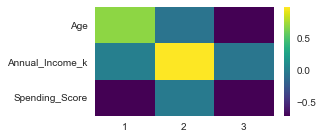

In [32]:
# Heatmap componentes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [25]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.44266167 0.33308378 0.22425454]


En este caso, la primera componente explica el 44% de la varianza observada en los datos y la segunda el 33%. La última el 22% de varianza explicada.

In [33]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44266167 0.77574546 1.        ]


Si se empleasen los dos primeros componentes, se conseguiría explicar el 87% de la varianza observada.

Una vez entrenado el modelo, con el método `transform()` se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables.

In [26]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3
0,-0.615720,-1.763481,1.324232
1,-1.665793,-1.820747,0.069952
2,0.337862,-1.674799,2.179025
3,-1.456573,-1.772430,0.078029
4,-0.038465,-1.662740,0.687342


## X. Ampliar

- t-SNE

## X. Bibliografía

- KSchool Data Science Master Ed. 23.
- Clustering y heatmaps: aprendizaje no supervisado by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/37_clustering_y_heatmaps
- Análisis de componentes princiaples PCA con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py19-pca-python.html